# Bank Churn Prediction Problem

## Context and Problem
 - Banks provide services to consumers however they have to worry about the problem of "Churning ". Churning is the action of customers that leave and join another provider. 
 - The costs is high on the banks, so finding a way that management can change these behaviors could really save the banks a lot of money.

## Objective: 
- Build a neural network based classifier that can determine whether they will leave or not in the next 6 months.
 
## Data Information

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has     purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )
                    

**Mounting the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

**Loading the required libraries**

#### **Reading the Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ChurnProj/Churn.csv')

In [4]:
# copy of data
df = data

#### Print the first five rows of the data

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Let's view the last 5 rows of the data
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
#Information about the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


-Surname, Geography, Gender are objects

-all others are numerical

-there are 10000 observations and 14 columns

In [8]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [9]:
#Checking the shape of the data
data.shape

(10000, 14)

In [10]:
#finding the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null values in the data set

### DROP UNNECESSARY VARIABLES

In [11]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

* ID column consists of uniques ID for clients and hence will not add value to the modeling
* RowNumber is a identifier that we can access already thus it provides no value to modeling
* CustomerID is a identifier that once again provides no value for modeling

In [12]:
data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* 79.63% did not leave the bank
* 20.37% did leave the bank


In [13]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* CreditScore has a mean of 650 and 50% of the data is at 652, so this shows some uniformity in the distribution
* Age 38.92 is the mean and the 50% of the IQR is 37. Still pretty close and would suggest that there is uniform pattern here with a slight skew
* Tenure is almost the same for the mean and the 50% level - it will be interesting to see those distributions
* Balance has a 76485 mean but a 50% of 97198.54 , so this observation is skewed
* NumOfProducts has a 1.53 mean but 50% have 1 or fewer
* HasCrCard has a mean of .7055 but 50% of 1 
* IsActiveMember has .515 but a 1 for 50% 
* EstimatedSalary 100090 for the mean and 100193 for 50% of the data
* Exited is the target variable - 

In [14]:
# Let's check the number of unique values in each column
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

- there are 2932 unique Surnames
- 460 different credit scores
- 3 geography
- 2 Gender
- 70 age
- 11 tenure
- Balance 
- 4 NumOfProducts
- 2 HasCrCard
- 2 IsActiveMember
- 9999 EstimatedSalary
- 2 Exited

In [15]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [16]:
# one last look at the data types
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Exploratory Data Analysis

#### Univariate Analysis

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### `Geography`

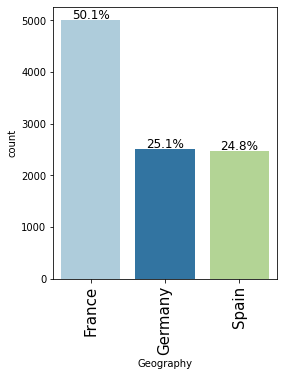

In [18]:
labeled_barplot(data, "Geography", perc=True)

* From the above bar plot we can see most of them have opted Jet Airways as their Airline for transportation

### `Gender`

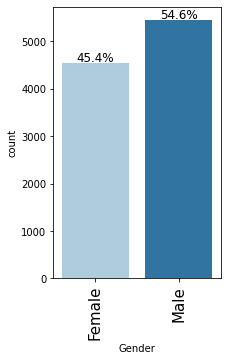

In [19]:
labeled_barplot(data, "Gender", perc=True)

* 45.4% of the data is represented by Females
* 54.6% of the data is represented by Males 

### `Age`

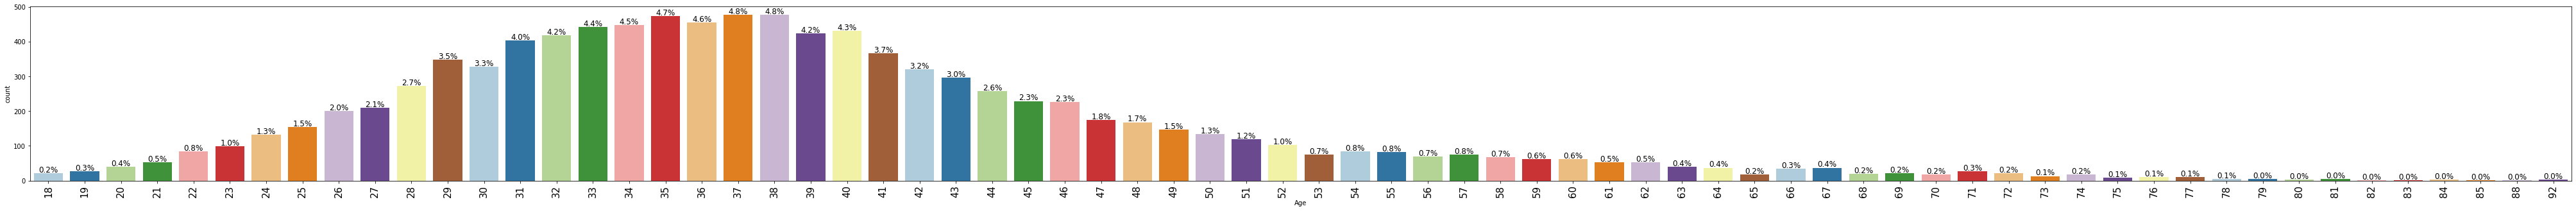

In [20]:
labeled_barplot(data, "Age", perc=True)

In [21]:
data.Age.skew()

1.0113202630234552

a right skew with outliers exist


### `Tenure`

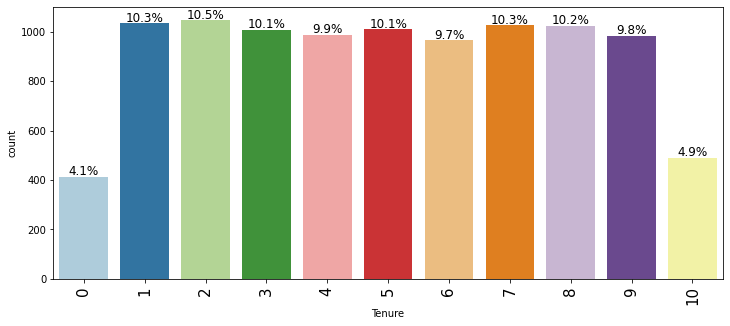

In [22]:
labeled_barplot(data, "Tenure", perc=True)

### `NumOfProducts`

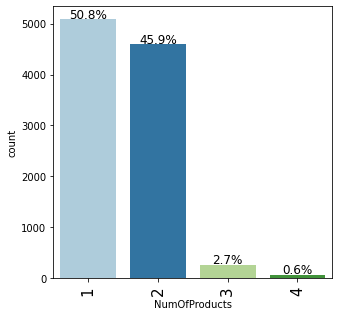

In [23]:
labeled_barplot(data, "NumOfProducts", perc=True)

* Most of our clients have 1 or 2 products and rarely do they have more than 2 

### `HasCrCard`




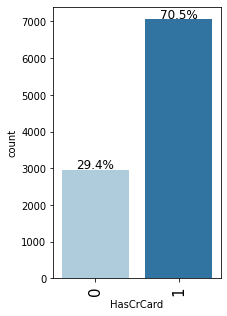

In [24]:
labeled_barplot(data, "HasCrCard", perc=True)

* Most have a credit card ( 70.5%)

IsActiveMember

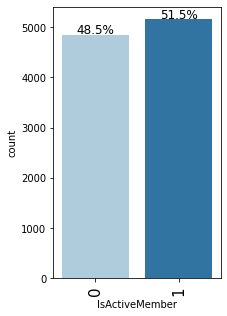

In [25]:
labeled_barplot(data, "IsActiveMember", perc=True)

48.5% of data set is not a very active client
51.5% of data set is active

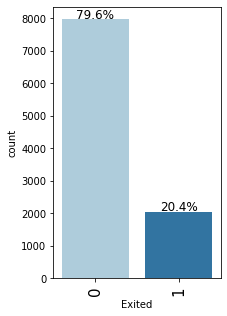

In [26]:
labeled_barplot(data, "Exited", perc=True)

* 20.4% of clients have churned- making it almost one in five customers. 

In [27]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Numeric columns along with categorical values showing in boxplots 

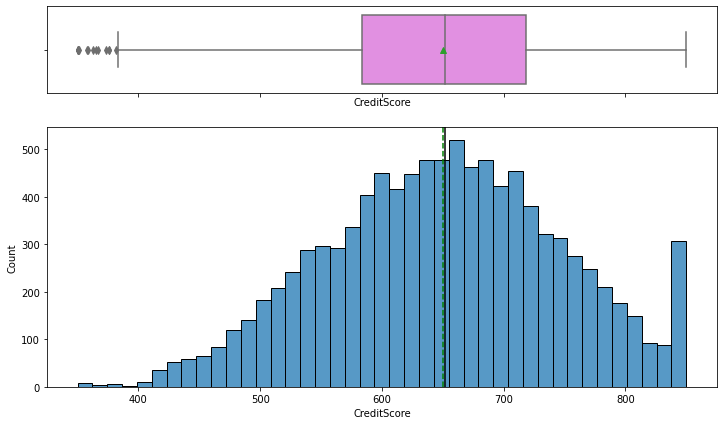

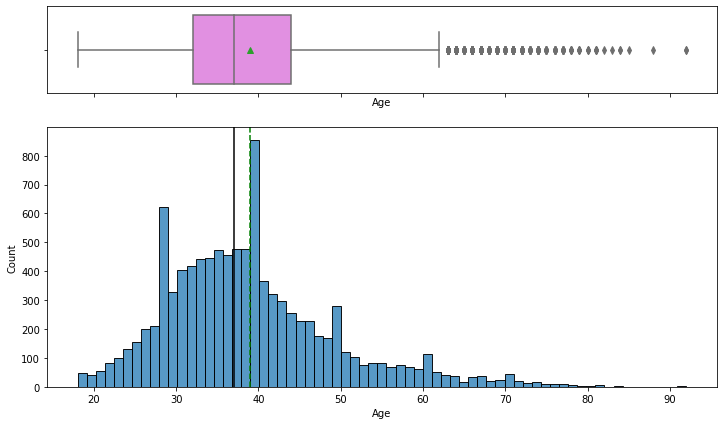

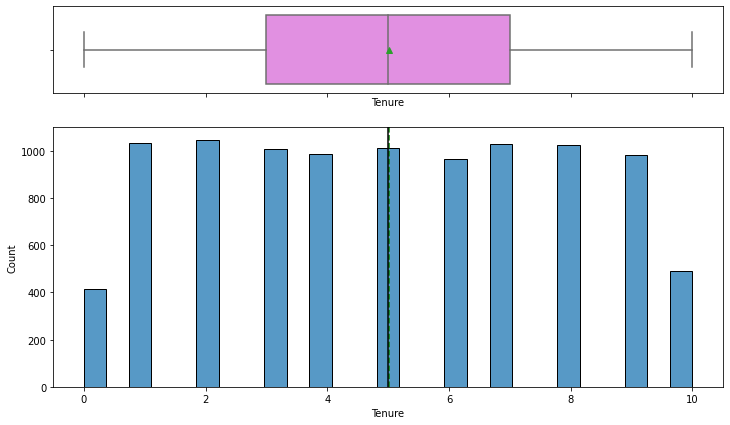

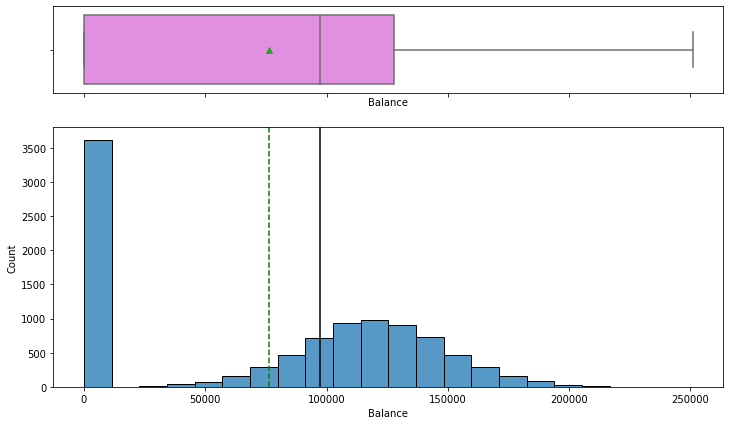

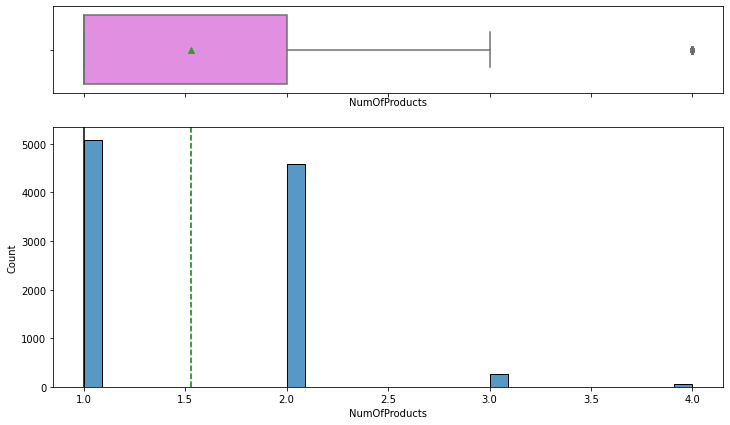

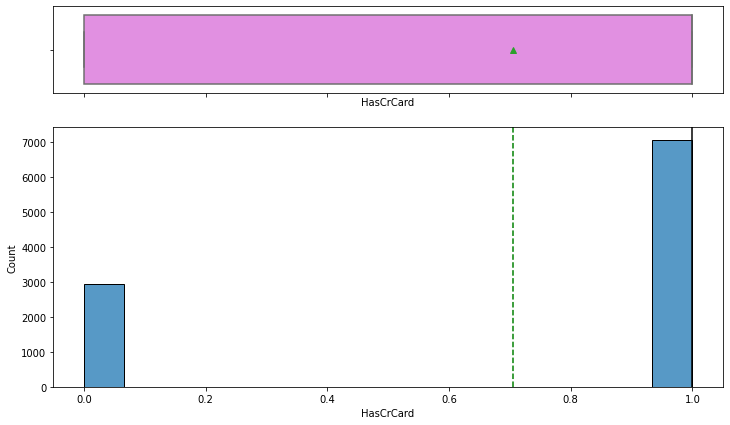

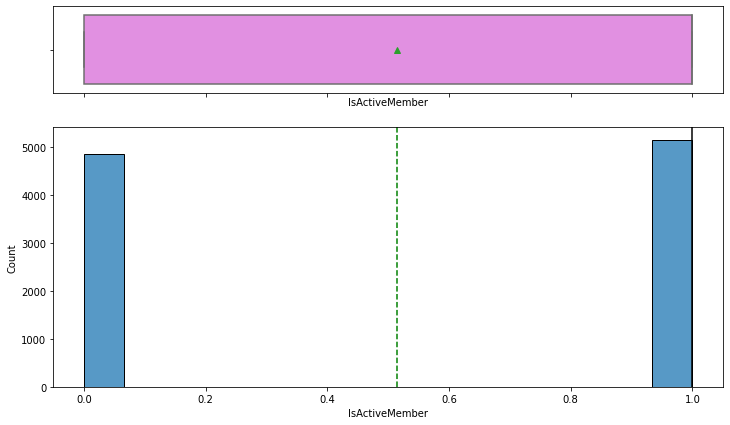

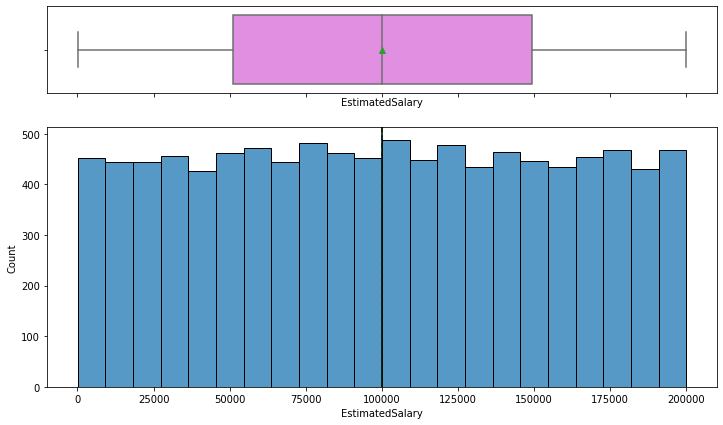

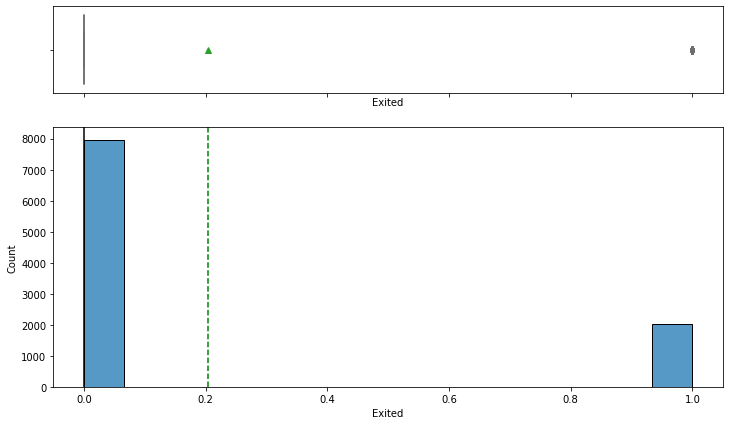

In [28]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

CreditScore

In [29]:
data.CreditScore.skew()

-0.07160660820092675

CreditScore shows a slight negative


EstimatedSalary

In [30]:
data.EstimatedSalary.skew()

0.0020853576615585162

Estimated Salary seems to be fairly evenly distributed among the income groups within the data

0    7963
1    2037
Name: Exited, dtype: int64


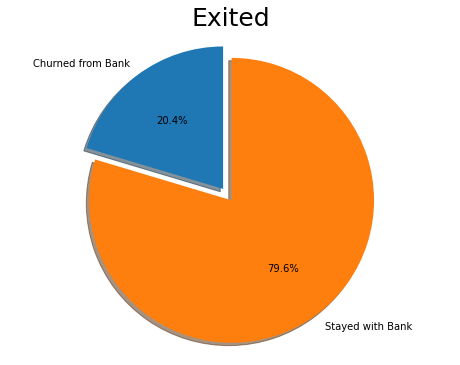

In [31]:
print(data.Exited.value_counts())
labels = 'Churned from Bank', 'Stayed with Bank'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Exited", size = 25)
plt.show()

### Bivariate analysis

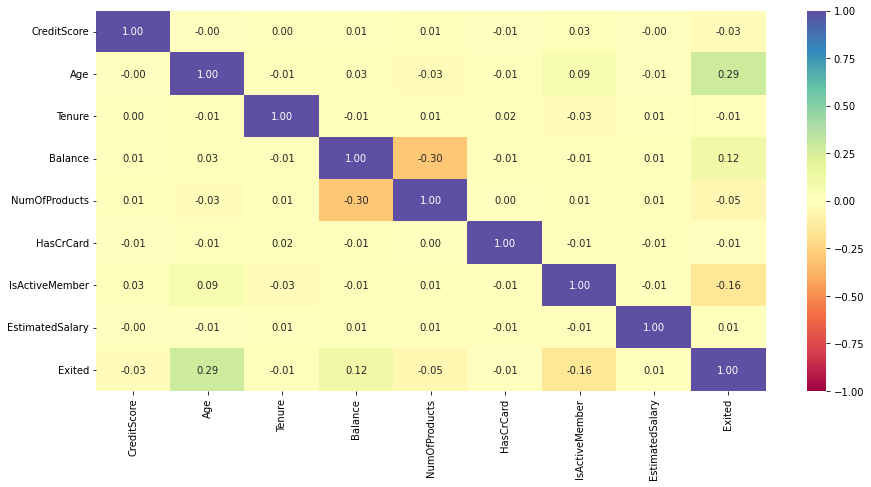

In [32]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* NumOfProducts and Balance have a slight negative correlation
* Age has a slight positive relationship with Exited

In [33]:
# df = pd.DataFrame(data)
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [34]:
# printed list of correlating features from lowest to highest
print(so)

CreditScore      Tenure             0.000842
Tenure           CreditScore        0.000842
EstimatedSalary  CreditScore        0.001384
CreditScore      EstimatedSalary    0.001384
HasCrCard        NumOfProducts      0.003183
                                      ...   
Balance          Balance            1.000000
Tenure           Tenure             1.000000
Age              Age                1.000000
EstimatedSalary  EstimatedSalary    1.000000
Exited           Exited             1.000000
Length: 81, dtype: float64


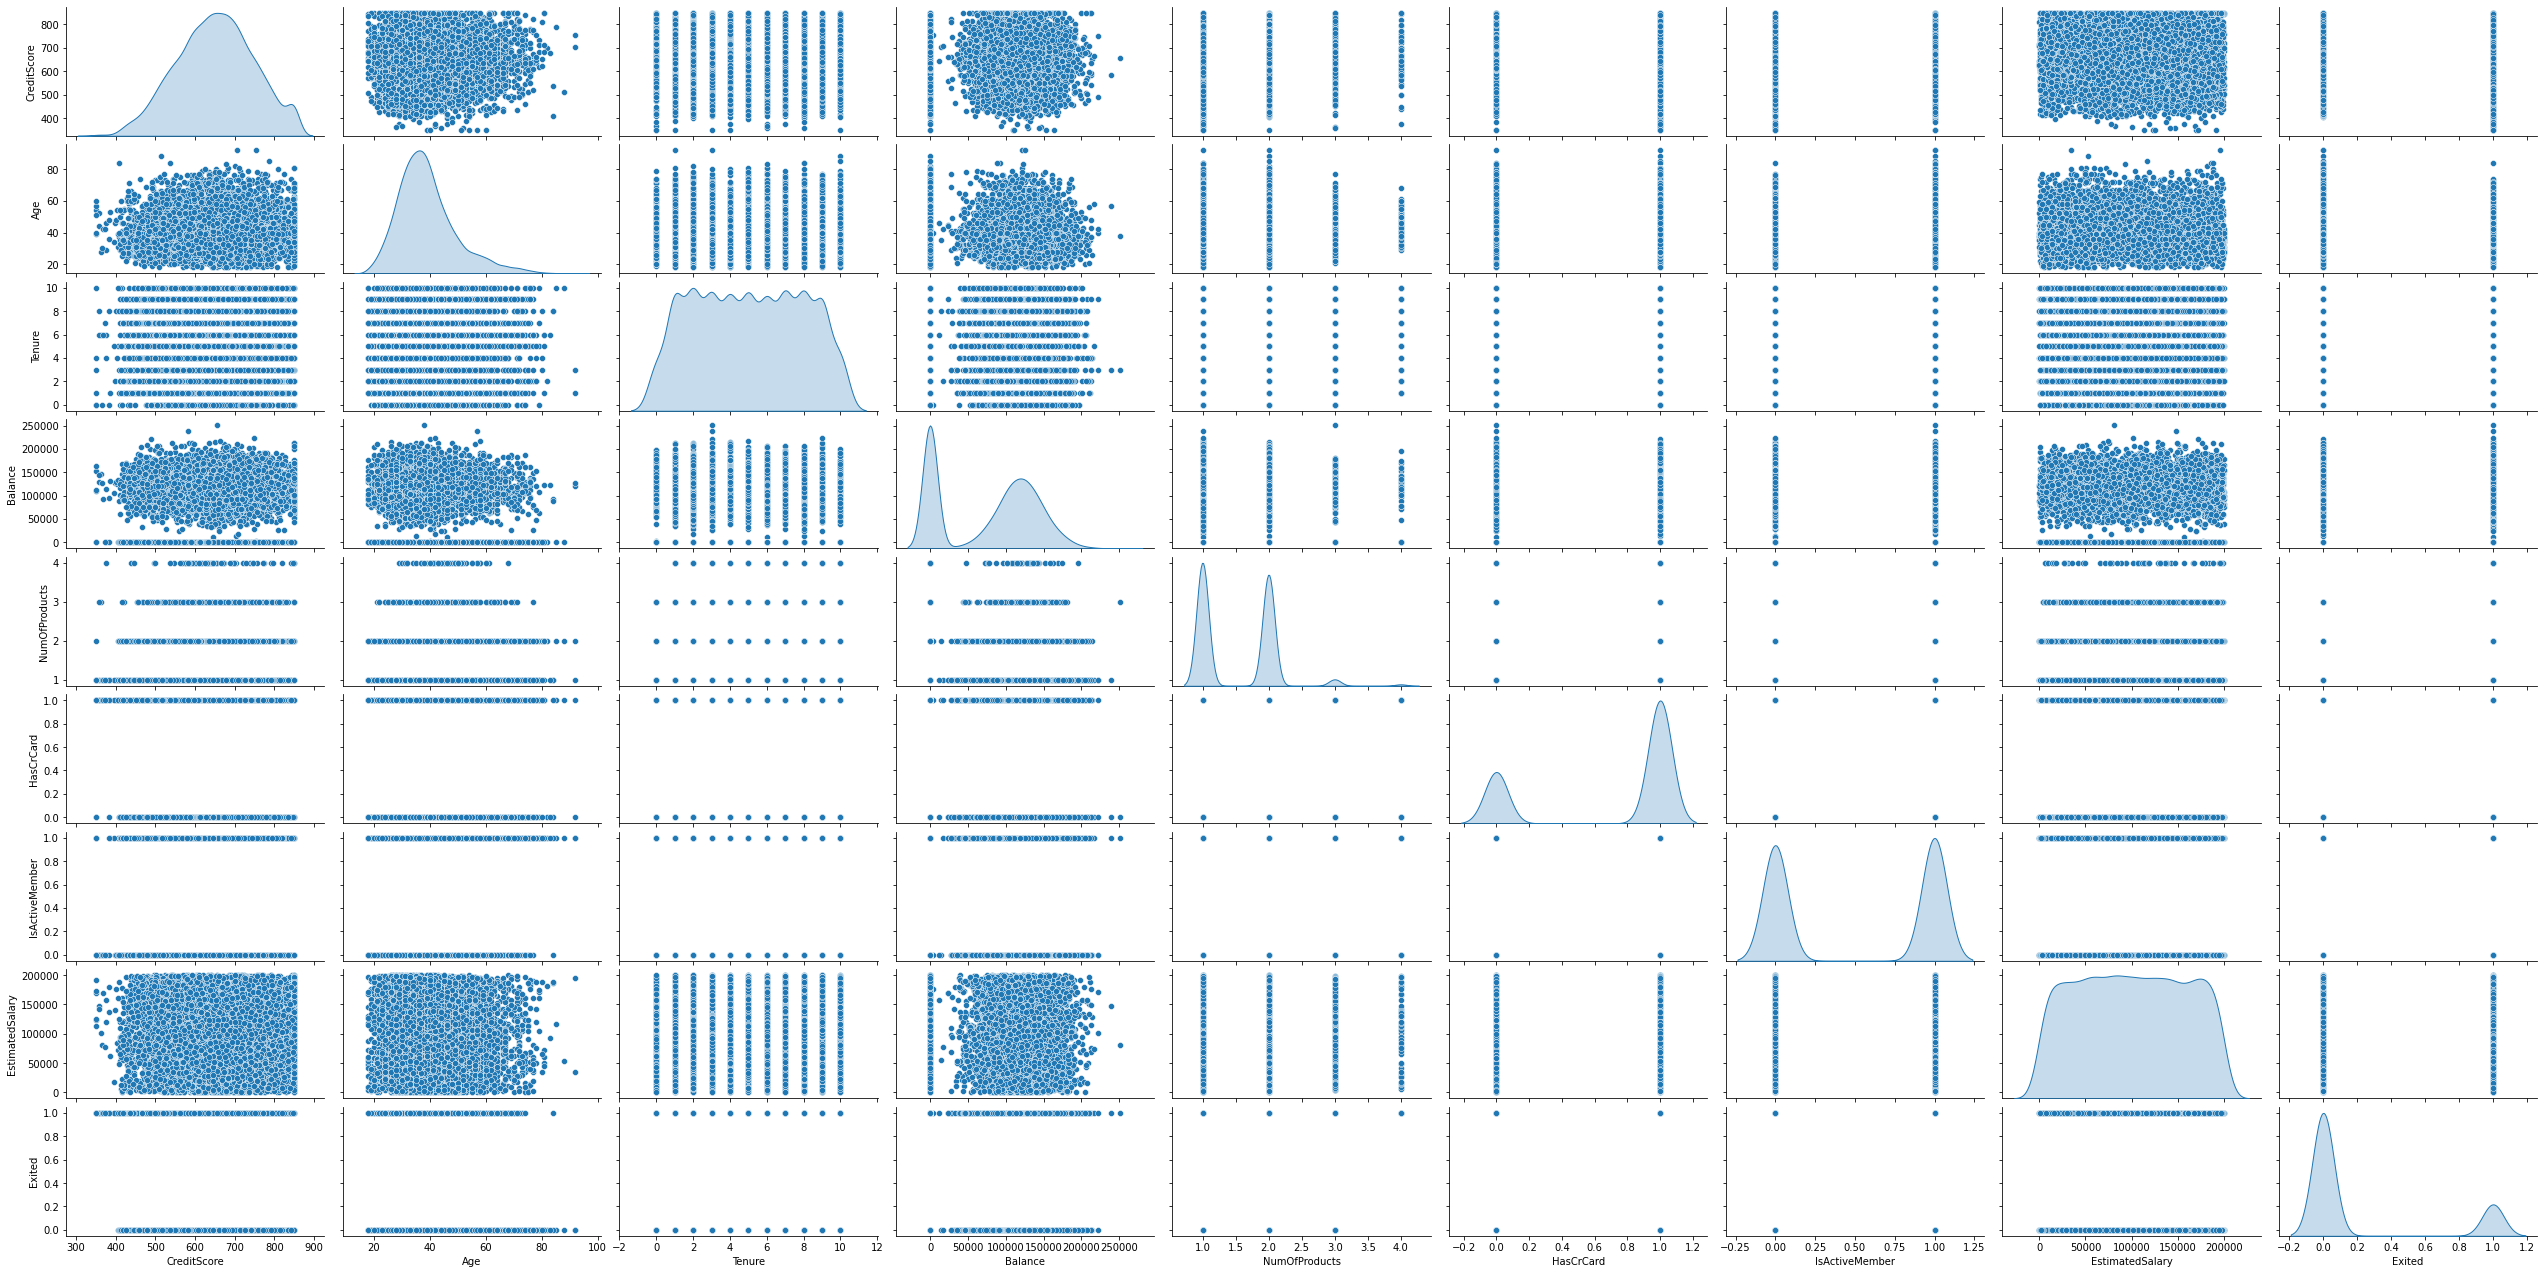

In [35]:
#importing seaborn for statistical plots
sns.pairplot(data, height=2,aspect=2 , diag_kind='kde')

### `CreditScore` vs `Excited`

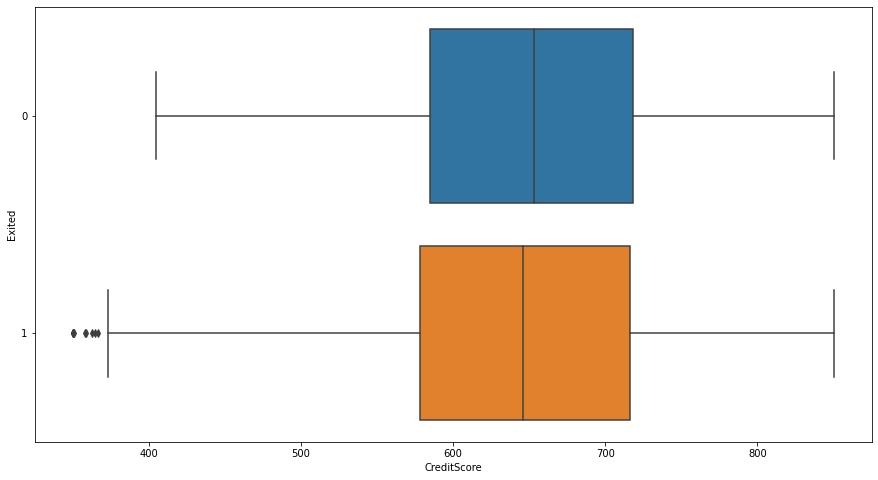

In [36]:
plt.figure(figsize=(15,8))
a=sns.boxplot(x='CreditScore',y='Exited',data=data.sort_values('CreditScore',ascending=False),orient="h")

- More lower credit scores churned with outliers

Geography vs Exited

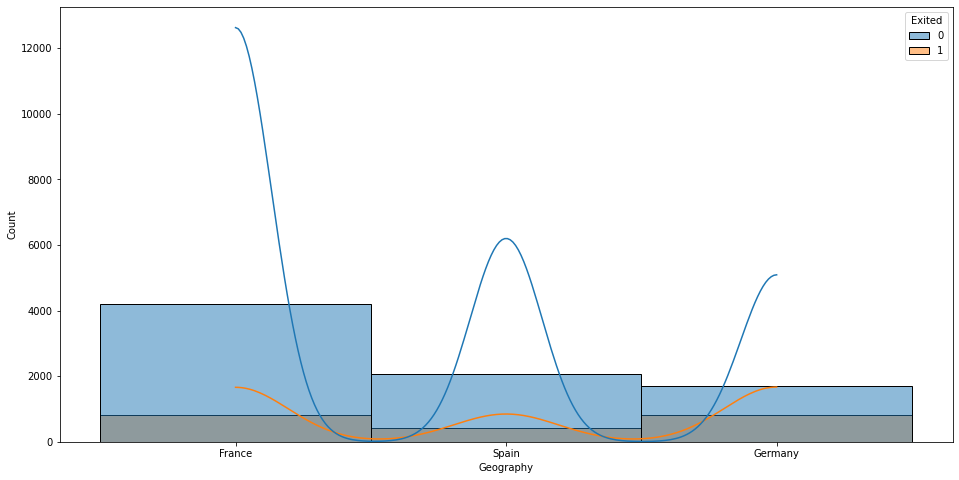

In [37]:
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x="Geography", hue="Exited", kde=True)

* Germany has the highest percentage of churning- it is disproportionate to other countries 

Gender vs Exited

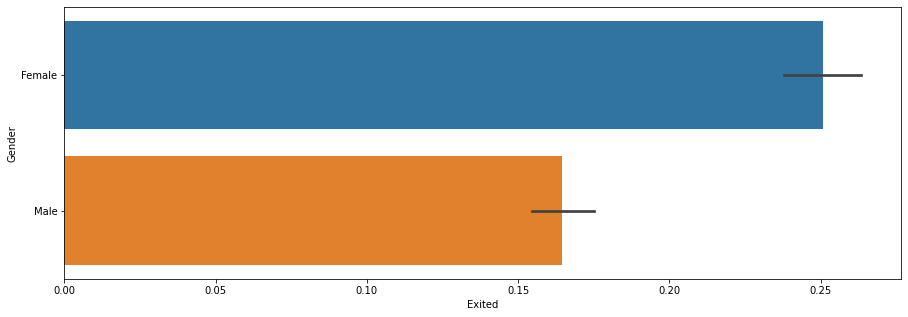

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(data=data, x="Exited", y="Gender")
plt.show()

* Females leave at a higher percentage than Males

Age vs Exited

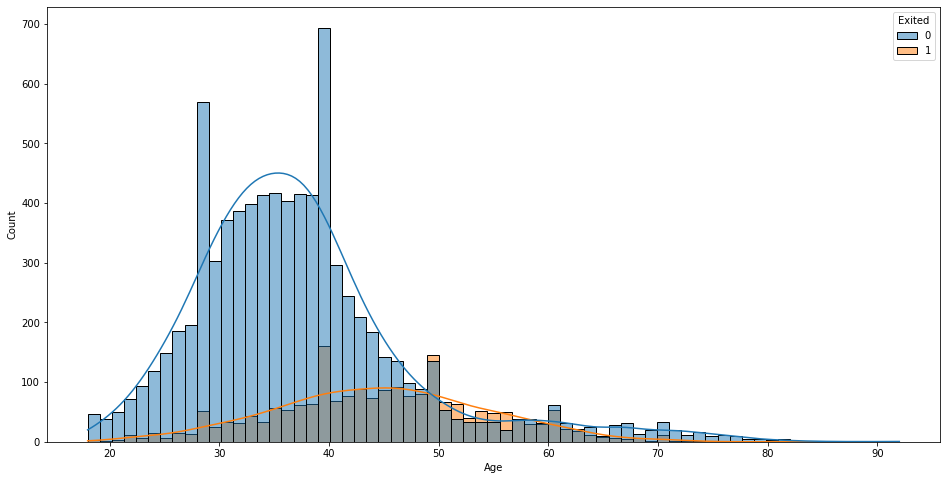

In [39]:
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x="Age", hue="Exited", kde=True)

* This is a interesting graph. There seems to be a distribution where at middle age( mid 40s) that the probability increases dramatically 

Tenure vs Exited

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

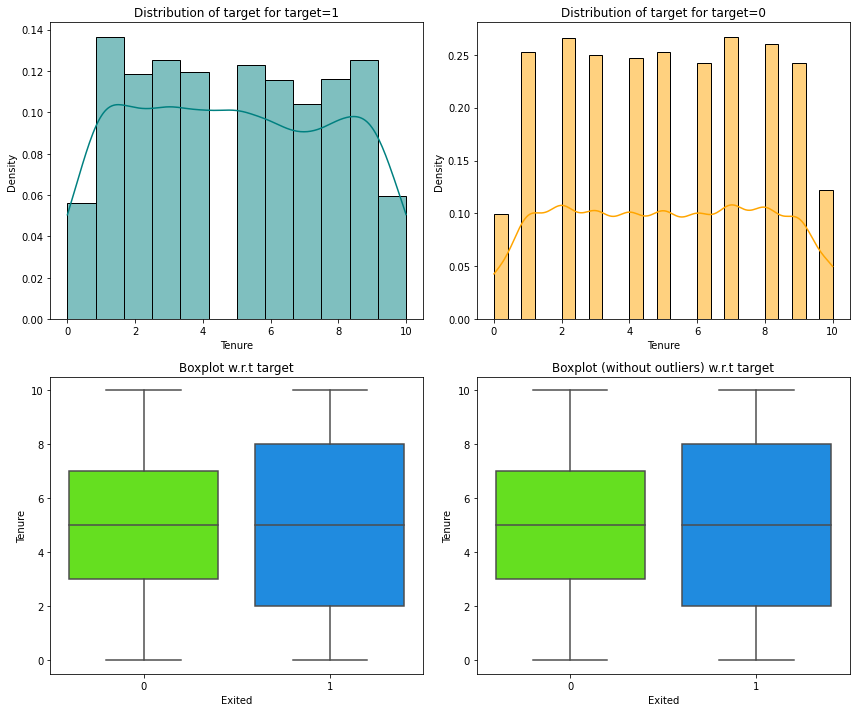

In [41]:

distribution_plot_wrt_target(data, "Tenure", "Exited")

Balance vs Exited

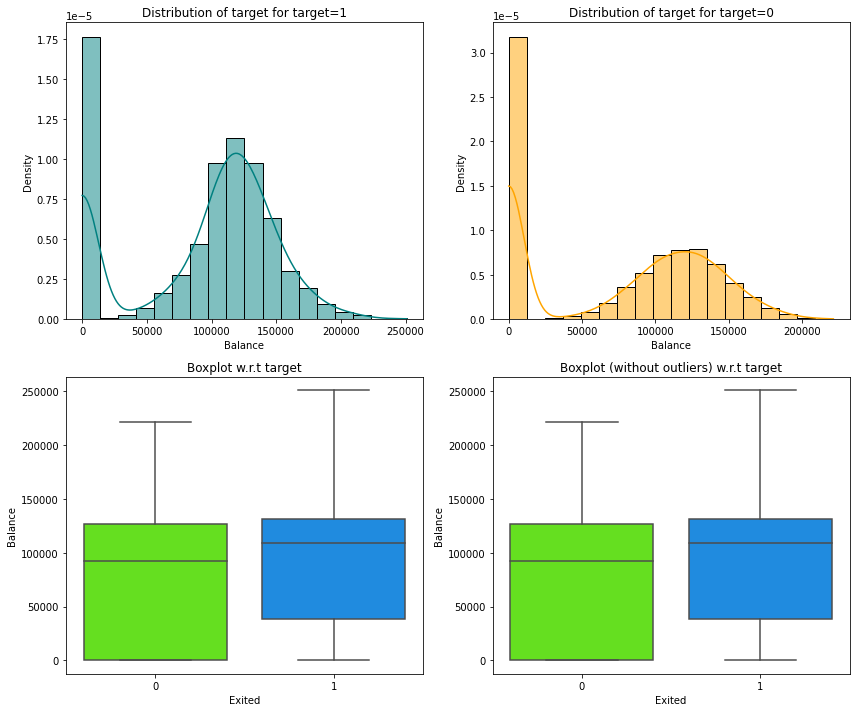

In [42]:

distribution_plot_wrt_target(data, "Balance", "Exited")

NumOfProducts vs Exited

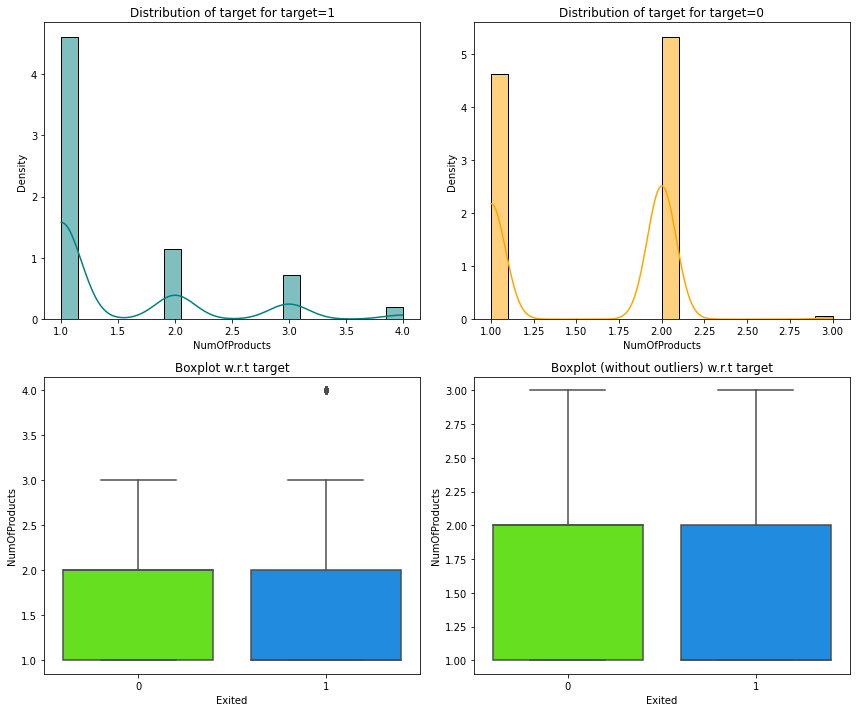

In [43]:

distribution_plot_wrt_target(data, "NumOfProducts", "Exited")

HasCrCard vs Exited

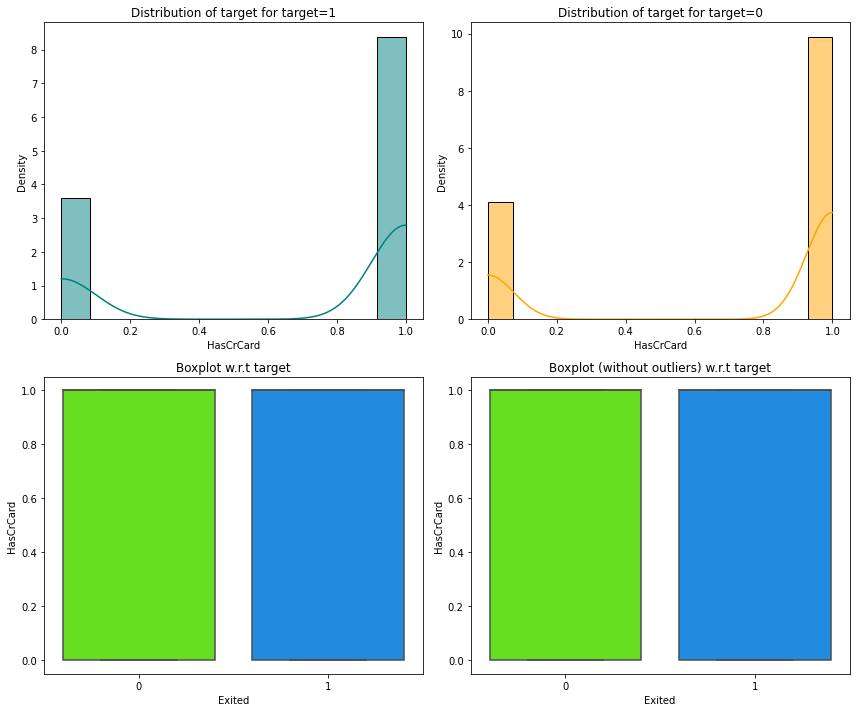

In [44]:

distribution_plot_wrt_target(data, "HasCrCard", "Exited")

IsActiveMember vs Exited

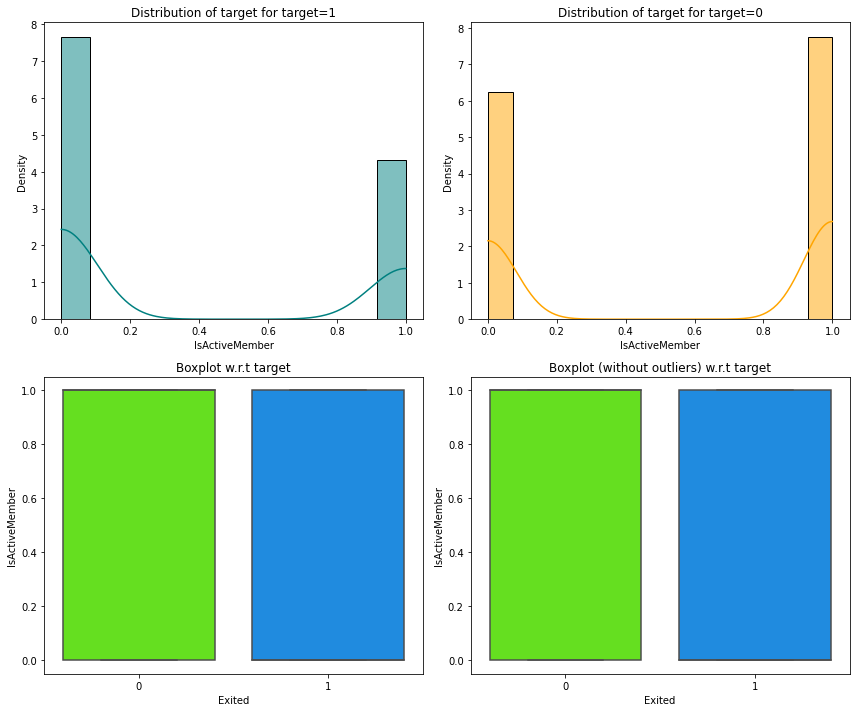

In [45]:

distribution_plot_wrt_target(data, "IsActiveMember", "Exited")

EstimatedSalary vs Exited

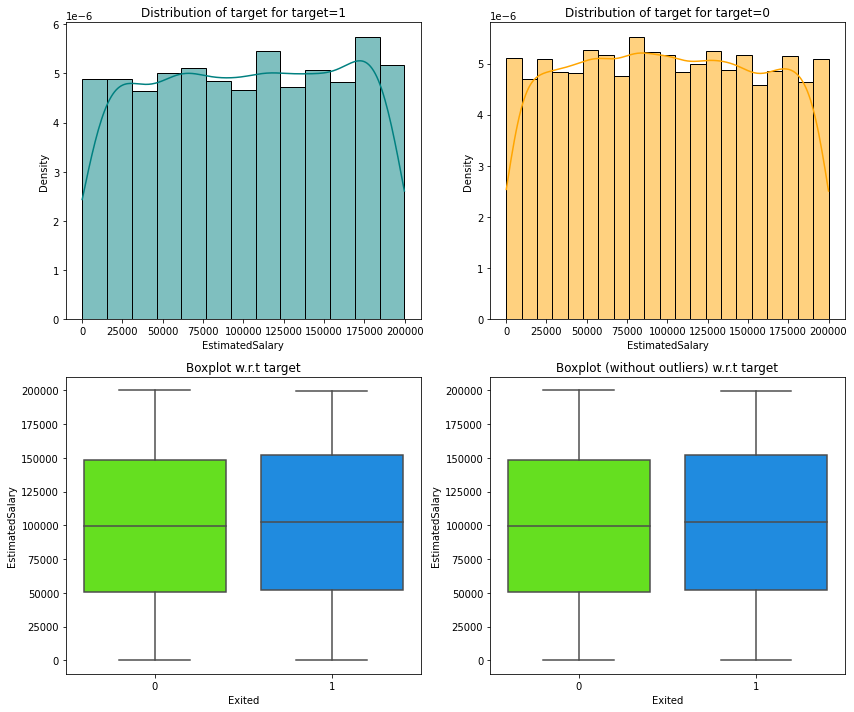

In [46]:

distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

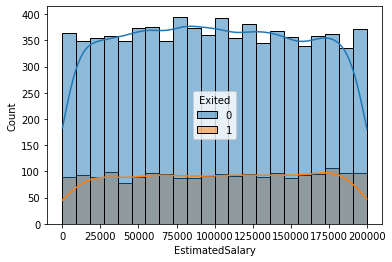

In [47]:
sns.histplot(data=data, x="EstimatedSalary", hue="Exited", kde=True)

In [48]:
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [49]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [50]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,692,Germany,Male,49,6,110540.43,2,0,1,107472.99


NORMALIZING and ENCODING

In [51]:
## Scaling the data from numeric columns
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]])
# X_val[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]])

- Since this is a classification  problem- we will not need to scale the target variable - Exited

Categorical Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()
X_train['Geography']= labelencoder_RE.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_RE.transform(X_test['Geography'])

In [53]:
labelencoder_EN = LabelEncoder()
X_train['Gender'] =  labelencoder_EN.fit_transform(X_train['Gender'])
X_test['Gender'] =  labelencoder_EN.transform(X_test['Gender'])

In [54]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000, 1)
(2000, 10)
(2000, 1)


In [55]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


Align method - although it doesnt appear we will need this it seems like a good practice

In [56]:
X_train,X_test = X_train.align(X_test,join='outer',axis=1,fill_value=0)

#Model Building

### Random Forest
- Not a ANN, but good for comparison

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)

In [59]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [60]:
y_pred = random_forest.predict(X_test)

In [61]:
random_forest.score(X_test,y_test)

0.8585

In [62]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

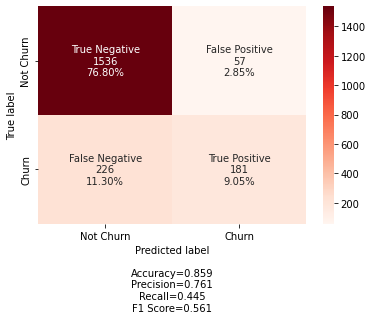

In [63]:
cm3=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

* Random Forest was acheived 85.9% Accuracy, Precision of 76.1%, Recall at 44.5% and a F1 score of 56.1

Model predicts 9.05% of those that churn and misses 11.3% 
Model only predicts incorrectly 2.85% . 


###  Model evaluation criterion

* Model can make wrong predictions as:
- Predicting a Client is Churning and the Client is not Churning
- Predicting a Client is not Churning and Client does Churn

* Which case is more important?
Predicting that Client is not Churning but they end up Churning. It might enable the bank to enact proactive elements to deter this action and save the bank a customer and the loss associated with Churning.

* How to reduce this loss i.e need to reduce False Negative?
Company would want Recall and Precision to be maximized, greater the Recall higher the chances of minimizing false Negative, however accurately determining the consumer would save the bank resources  Hence, the focus should be on increasing the F1 score so we can accurately and correctly determine the churning customers

#### Lets see if a Deep Neural Network can improve these scores

#**Deep Neural Network**

Model-1

We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not churning (0) or churn (1).
a dropout step is included to prevent overfitting.

Dropout

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

#### Creating a model

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

#### Adding layers and activations

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [64]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 10, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [66]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [68]:
history=model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 662108542315799167123849216.0000 - accuracy: 0.7859 - val_loss: 0.5854 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.7953 - val_loss: 0.5384 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5312 - accuracy: 0.7953 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.7953 - val_loss: 0.5095 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.7953 - val_loss: 0.5051 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7953 - val_loss: 0.5030 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.7953 - val_loss: 0.5019 - v

63/63 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7965


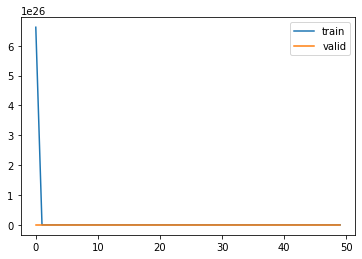

In [69]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

It looks like this model is not capturing the data properly and thus the gap between the train and validation- poor results - Machine learning model performed far better

In [70]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

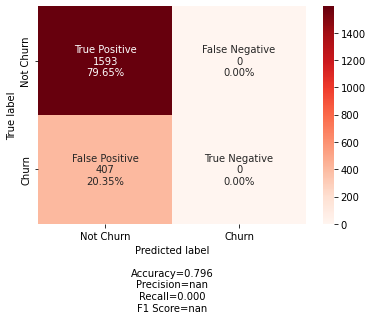

In [71]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

The model is not performing well - it was unable to predict false negatives or True negatives. Its predicted non-churning for the entire set and therefore was unable to determine the 20.35% that churned. 

Model is unacceptable. 

In [72]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



* lets definitely try another model

# Model II

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [75]:
#initialize the model
model2 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(units=16, input_dim = 10,activation='relu'))   # input of 10 columns as shown above
# hidden layer
model2.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model2.add(Dropout(0.3))
model2.add(Dense(24,activation='relu'))
model2.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (churn or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

#### Model Compile ( optimizers and loss functions)

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [76]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Print the summary of model 1 

In [77]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________



- Train the model

In [78]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 1061.1094 - accuracy: 0.7111 - val_loss: 3096.8774 - val_accuracy: 0.8131
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 675.7664 - accuracy: 0.7312 - val_loss: 338.5339 - val_accuracy: 0.4781
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 621.1476 - accuracy: 0.7341 - val_loss: 738.0656 - val_accuracy: 0.8112
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 428.8754 - accuracy: 0.7334 - val_loss: 285.5880 - val_accuracy: 0.8119
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 408.3792 - accuracy: 0.7366 - val_loss: 657.7419 - val_accuracy: 0.8150
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 418.7954 - accuracy: 0.7295 - val_loss: 22.4571 - val_accuracy: 0.8131
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 383.7627 - accuracy: 0.7236 - val_loss: 168.0042 

Plotting the train and test loss

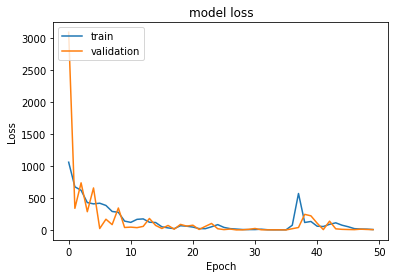

In [79]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Around the 21st epoch the model seems to optimize for this model

Best Threshold=0.999688, G-Mean=0.591


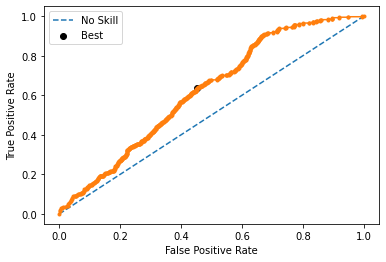

In [80]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [81]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

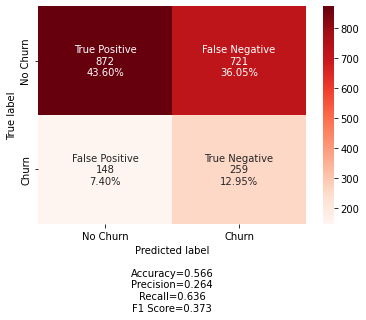

In [82]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

Accuracy for model 2 
- Accuracy 56.5
- Precision-26.9
- Recall 66.1
- F1 Score 38.2

Performance is lacking on Model 2

Model predicts 12.95% of those that churn correctly but misses 7.4%
Model places 36.05% of the population into into the churn, which could be quite expensive 

In [83]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.55      0.67      1593
           1       0.26      0.64      0.37       407

    accuracy                           0.57      2000
   macro avg       0.56      0.59      0.52      2000
weighted avg       0.73      0.57      0.61      2000



# Model 3

In [85]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [86]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [87]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [88]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [89]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 4s 13ms/step - loss: 0.5067 - accuracy: 0.7698 - val_loss: 0.6039 - val_accuracy: 0.5869
Epoch 2/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4552 - accuracy: 0.8056 - val_loss: 0.5028 - val_accuracy: 0.7950
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4543 - accuracy: 0.8078 - val_loss: 0.4729 - val_accuracy: 0.8025
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8089 - val_loss: 0.4578 - val_accuracy: 0.8019
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.8105 - val_loss: 0.4605 - val_accuracy: 0.8025
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8112 - val_loss: 0.4827 - val_accuracy: 0.7956
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8128 - val_loss: 0.4499 - val_accuracy: 0.8087
Epoch

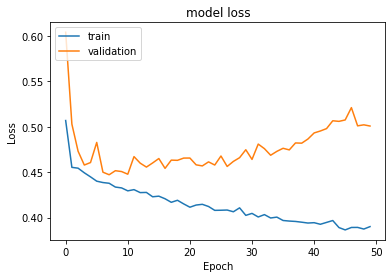

In [90]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* There is a lot of noise
* overfitting is occurring
* model is optimizing around 9th epoch

Best Threshold=0.215577, G-Mean=0.549


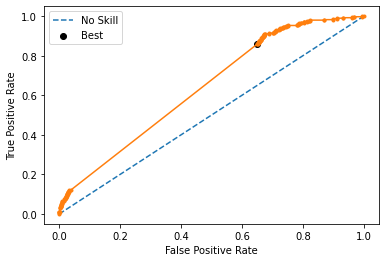

In [92]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

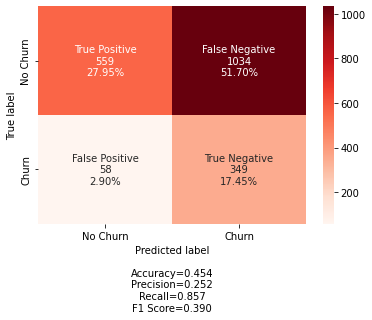

In [95]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

Model 3 performance
- model is overfitting 
- Accuracy 45.4
- Precision 25.2
- Recall 85.7
- F1 score 39

Model is performing poorly overall but it is predicting churn 17.45% and only misses 2.9% of those that churn

Model incorrectly places 51.7% of census into the Churn prediction- this could be quite expensive.

In [96]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.35      0.51      1593
           1       0.25      0.86      0.39       407

    accuracy                           0.45      2000
   macro avg       0.58      0.60      0.45      2000
weighted avg       0.77      0.45      0.48      2000



# Model 4

In [97]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [98]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [99]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [100]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [101]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 8ms/step - loss: 224.8257 - accuracy: 0.7186 - val_loss: 9.6269 - val_accuracy: 0.8000
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 36.0017 - accuracy: 0.7242 - val_loss: 0.5458 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 9.2185 - accuracy: 0.7483 - val_loss: 0.4976 - val_accuracy: 0.8000
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 2.9515 - accuracy: 0.7742 - val_loss: 0.4708 - val_accuracy: 0.8000
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 1.9278 - accuracy: 0.7873 - val_loss: 0.4541 - val_accuracy: 0.8025
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 1.3890 - accuracy: 0.7869 - val_loss: 0.4461 - val_accuracy: 0.8119
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 1.1425 - accuracy: 0.7927 - val_loss: 0.4425 - val_accuracy: 0.8106
Epo

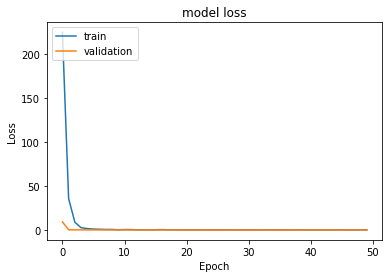

In [102]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.240221, G-Mean=0.565


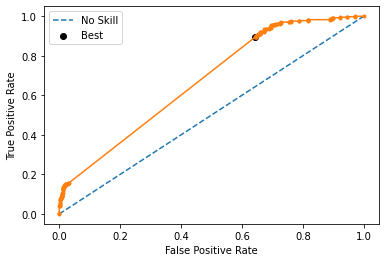

In [103]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [104]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

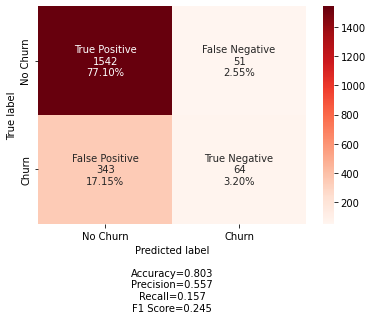

In [106]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

Model predicted 3.2% of those that would Churn
Model only predicted incorrectly 2.55% however it missed 17.15% of those that churned. 

Accuracy - 80.3
Precision - 55.7
Recall - 15.7
F1 score- 24.5

In [107]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.56      0.16      0.25       407

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.76      0.80      0.76      2000




The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score for predicting those that would churn is 25%. 


### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [124]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [125]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.



In [126]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [127]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 5ms/step - loss: 5156.0742 - accuracy: 0.7631 - val_loss: 0.5197 - val_accuracy: 0.8000
Best: 0.796625 using {'lr': 0.1, 'batch_size': 64}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [128]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [129]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 7694.9888 - accuracy: 0.7805 - val_loss: 0.5031 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 1.6308 - accuracy: 0.7937 - val_loss: 0.5031 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 2.0189 - accuracy: 0.7931 - val_loss: 0.5022 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 1.3924 - accuracy: 0.7934 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.8397 - accuracy: 0.7945 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.7169 - accuracy: 0.7941 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.7945 - val_loss: 0.5005 - val_accuracy: 0.8000
Epo

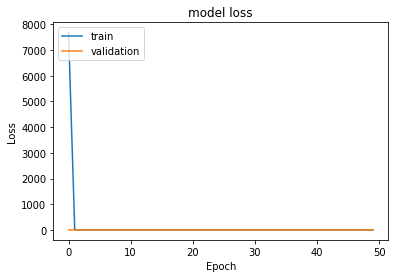

In [130]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=1.192533, G-Mean=0.000


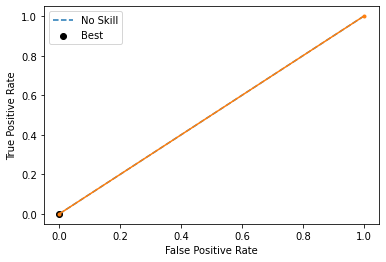

In [131]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [132]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

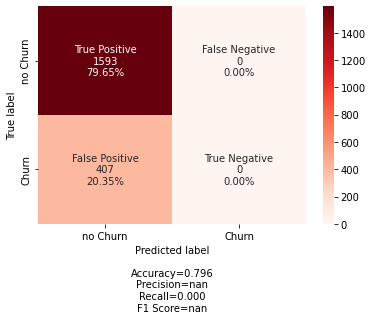

In [135]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'no Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

Model performed poorly - 

Accuracy is at 79.6
it did not predict any churn- so we missed all opportunities

In [134]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



Hyperparameter tuning is used here to get a better F1 score, but unfortunately it was unsuccessful probably due to the overfitting from the model

Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration. 

Let's use the more exhaustive Grid Search CV and see if the F1 score increases.

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [156]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [157]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [158]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [159]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
100/100 [==============================] - 1s 6ms/step - loss: 236.8031 - recall: 0.1740 - val_loss: 0.5148 - val_recall: 0.0000e+00
Best: nan using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 40.71103119850159


The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.1}

Let's create the final model with the above mentioned configuration

In [160]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [161]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['Recall'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 3s 11ms/step - loss: 333.0044 - recall: 0.1824 - val_loss: 0.5264 - val_recall: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 1.9715 - recall: 0.0794 - val_loss: 0.4611 - val_recall: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 1.1242 - recall: 0.0740 - val_loss: 0.4423 - val_recall: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.7929 - recall: 0.0534 - val_loss: 0.4408 - val_recall: 0.0406
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.7165 - recall: 0.0450 - val_loss: 0.4378 - val_recall: 0.0812
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.6316 - recall: 0.0847 - val_loss: 0.4331 - val_recall: 0.1125
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5759 - recall: 0.0954 - val_loss: 0.4333 - val_recall: 0.1156
Epoch 8/50
100/100 

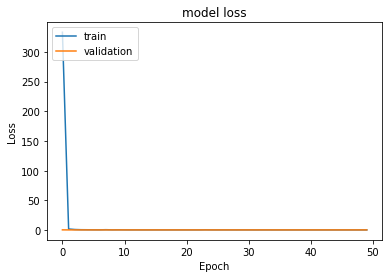

In [162]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.220872, G-Mean=0.562


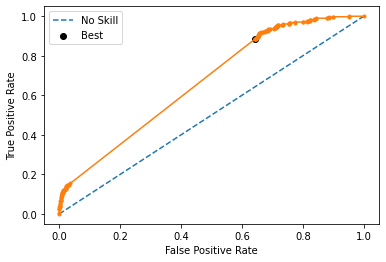

In [163]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [164]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

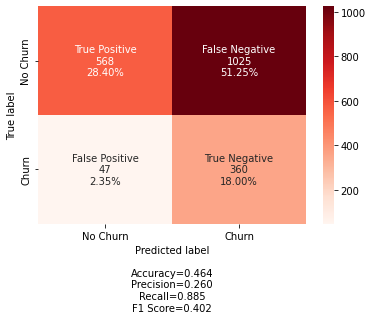

In [165]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

- solved for recall and improved the score
- model predicted 18% of those that would churn however it also incorrectly predicted 51.2% of the other observations would churn. This could be quite expensive depending on the solution
- F1 score was improved but still very low


Model 

In [166]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.92      0.36      0.51      1593
           1       0.26      0.88      0.40       407

    accuracy                           0.46      2000
   macro avg       0.59      0.62      0.46      2000
weighted avg       0.79      0.46      0.49      2000




Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time. 

Other hyperparameters can also be tuned to get better metrics. 

Here, the F1 score of the model, while better than in Randomized Search, is slightly lower than in Model 4 (the Dropout model).

### Dask

* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn. 

In [167]:
# Try below code to install dask in Google Colab
!pip install dask-ml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 35.7 MB/s 
     |████████████████████████████████| 837 kB 48.4 MB/s 
     |████████████████████████████████| 141 kB 64.5 MB/s 
     |████████████████████████████████| 830 kB 64.7 MB/s 
     |████████████████████████████████| 822 kB 49.8 MB/s 
     |████████████████████████████████| 802 kB 61.3 MB/s 
     |████████████████████████████████| 802 kB 65.8 MB/s 
     |████████████████████████████████| 793 kB 64.2 MB/s 
     |████████████████████████████████| 793 kB 67.9 MB/s 
     |████████████████████████████████| 791 kB 65.1 MB/s 
     |████████████████████████████████| 786 kB 55.7 MB/s 
     |████████████████████████████████| 779 kB 50.3 MB/s 
     |████████████████████████████████| 778 kB 73.4 MB/s 
     |████████████████████████████████| 776 kB 36.1 MB/s 
     |████████████████████████████████| 769 kB 40.7 MB/s 
     |█████████████████████████

In [169]:
# importing library
# sometimes will need to run 2 times if a error occurs
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [174]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [175]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [176]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

100/100 [==============================] - 1s 5ms/step - loss: 259.2271 - accuracy: 0.7098 - val_loss: 30.1185 - val_accuracy: 0.8000
Best: 0.796250 using {'batch_size': 64, 'lr': 0.001}
Total runtime of the program is 43.92137885093689


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large- this data selection is not large enough
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We may use keras Tuner 

In [177]:
## Install Keras Tuner
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 32.6 MB/s 


### Keras Tuner

In [186]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [187]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [188]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [189]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [190]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [191]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [184]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8149999976158142
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8141666650772095
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8137499888737997
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8129166762034098
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
uni

#MODEL 7
- Creating a model using Keras Tuner

In [192]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [193]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [194]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [195]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [196]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 2627.8047 - accuracy: 0.7152 - val_loss: 365.0414 - val_accuracy: 0.8112
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 416.6473 - accuracy: 0.7258 - val_loss: 615.6541 - val_accuracy: 0.8106
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 290.1358 - accuracy: 0.7364 - val_loss: 12.9474 - val_accuracy: 0.8112
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 165.3777 - accuracy: 0.7292 - val_loss: 393.6973 - val_accuracy: 0.8106
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 220.9920 - accuracy: 0.7408 - val_loss: 88.6616 - val_accuracy: 0.8106
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 111.9422 - accuracy: 0.7472 - val_loss: 223.3019 - val_accuracy: 0.8112
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 94.1072 - accuracy: 0.7405 - val_loss: 21.8366 - va

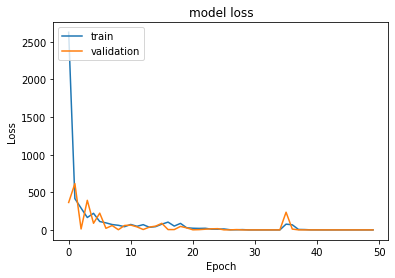

In [197]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.205046, G-Mean=0.600


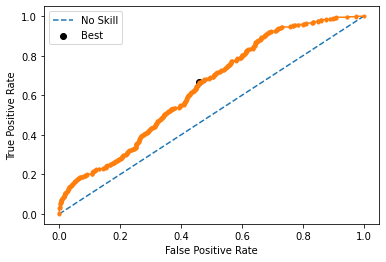

In [198]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [199]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

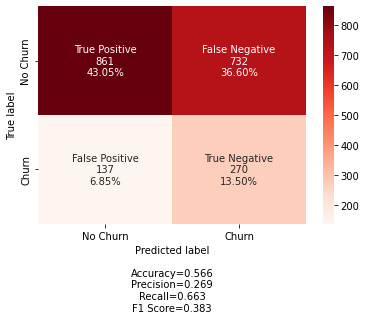

In [200]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

- this model predicted correctly 13.5% of those that would churn.
- incorrectly missed 6.85% , and incorrectly estimated that 36.6% would churn- however they did not . 

overall this model appears to have perfomred better than most with a recall of 66.3 and a F1 score of 38.3

In [201]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.86      0.54      0.66      1593
           1       0.27      0.66      0.38       407

    accuracy                           0.57      2000
   macro avg       0.57      0.60      0.52      2000
weighted avg       0.74      0.57      0.61      2000




* After using the suggested hyperparameters from Keras Tuner, the F1 score has slightly increased, and the False Negative rate is higher in comparison to the previous optimization technique model.


* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

# Model 8

# SMOTE + KERAS TUNER

In [202]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [203]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [204]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [205]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Churn')

In [206]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [207]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.9264782865842184

Best val_accuracy So Far: 0.9428309798240662
Total elapsed time: 00h 02m 31s


In [208]:
tuner_2.results_summary()

Results summary
Results in ./Churn
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.9428309798240662
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.9355049729347229
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.9264782865842184
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.9160125454266866
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units

In [209]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [210]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [211]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [212]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 1s 5ms/step - loss: 2197.2905 - accuracy: 0.6230 - val_loss: 0.1296 - val_accuracy: 0.9427
Epoch 2/50
160/160 [==============================] - 1s 4ms/step - loss: 321.0462 - accuracy: 0.6206 - val_loss: 0.1672 - val_accuracy: 0.9199
Epoch 3/50
160/160 [==============================] - 1s 4ms/step - loss: 306.8683 - accuracy: 0.6342 - val_loss: 0.1957 - val_accuracy: 0.9011
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 151.0431 - accuracy: 0.6397 - val_loss: 0.1293 - val_accuracy: 0.9368
Epoch 5/50
160/160 [==============================] - 1s 5ms/step - loss: 203.4985 - accuracy: 0.6350 - val_loss: 0.0890 - val_accuracy: 0.9521
Epoch 6/50
160/160 [==============================] - 1s 4ms/step - loss: 47.5007 - accuracy: 0.6380 - val_loss: 102.9772 - val_accuracy: 0.2147
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 65.9882 - accuracy: 0.6507 - val_loss: 293.5008 - val_accura

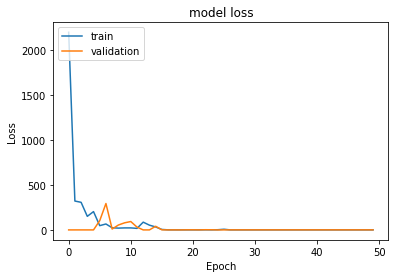

In [213]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.226642, G-Mean=0.557


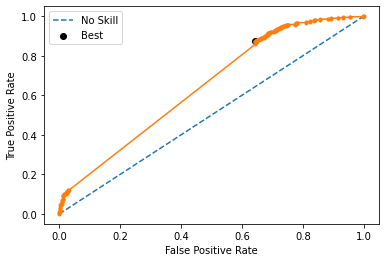

In [214]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [215]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

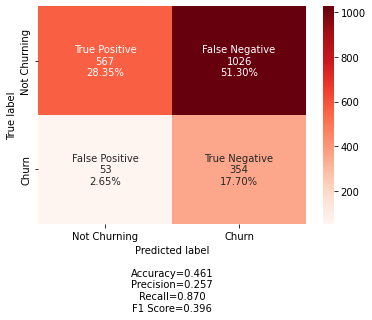

In [217]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churn']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

In [218]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.91      0.36      0.51      1593
           1       0.26      0.87      0.40       407

    accuracy                           0.46      2000
   macro avg       0.59      0.61      0.45      2000
weighted avg       0.78      0.46      0.49      2000



SMOT helped the F1 score improve slightly 
Model correctly predicts 17.7% of Churning , however it incorrectly predicts 51.3% will churn and it misses 2.65% of churners

# Model 10

In [219]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [220]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [221]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [222]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 225.8293 - accuracy: 0.7170 - val_loss: 20.0906 - val_accuracy: 0.8000


In [223]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.001}


In [224]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [225]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 4ms/step - loss: 316.7788 - accuracy: 0.5948 - val_loss: 0.2351 - val_accuracy: 0.8772
Epoch 2/50
319/319 [==============================] - 1s 4ms/step - loss: 38.1556 - accuracy: 0.6146 - val_loss: 0.2368 - val_accuracy: 0.8980
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 8.5201 - accuracy: 0.6255 - val_loss: 0.2653 - val_accuracy: 0.9243
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 3.0966 - accuracy: 0.6265 - val_loss: 0.2404 - val_accuracy: 0.9168
Epoch 5/50
319/319 [==============================] - 1s 4ms/step - loss: 1.6607 - accuracy: 0.6428 - val_loss: 1.0360 - val_accuracy: 0.1735
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 1.1382 - accuracy: 0.6371 - val_loss: 0.6508 - val_accuracy: 0.8057
Epoch 7/50
319/319 [==============================] - 1s 4ms/step - loss: 0.9819 - accuracy: 0.6358 - val_loss: 0.9335 - val_accuracy: 0.1907
Epo

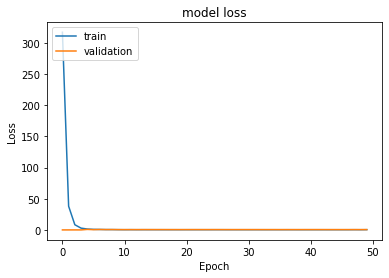

In [226]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=0.424457, G-Mean=0.571


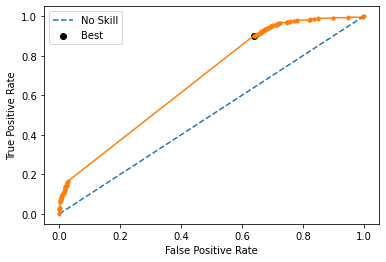

In [227]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [228]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

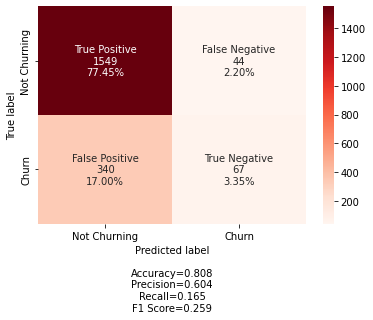

In [229]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Churning','Churn']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

In [230]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.60      0.16      0.26       407

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.57      2000
weighted avg       0.78      0.81      0.76      2000



# Potential areas of improvement for the model and prediction
1. The model was over fitting - this is probably due to the small amount of data. 
2. Additional variables associated with the consumers may provide a more robust predictive element. 
3. A variable from the census which ties into customer sentiment. 


# Model Recommendation 
1. Leadership will want to evaluate the cost associated with their retention plan so they can determine how severe of a impact a large False Negative would impact thier budgets
2. If leadership is only concerned about the predictive element of the model then the 6th model is the selection (GRIDSEARCH CV NEURAL MODEL) . This model correctly predicts 360 out 407 customers that would churn. It however does come at a cost of falsely predicting 1025 that are not churning 

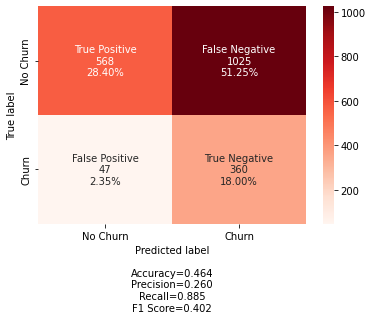

In [232]:
# GRIDSEARCH CV NEURAL NETWORK MODEL
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

3. If leadership is more concerned about a balanced approach and is looking for the maximum bang for the buck a couple of other models may be considered. 
- a. Random Forest ( non-Neural Network ) correctly predicted 9.05% of churners while only falsely predicting 2.85% would churn whereas they will not. 
- b. The 4th model ( drop out) would provide a cost consciencious leader to still address the issue while being able conserve expenses


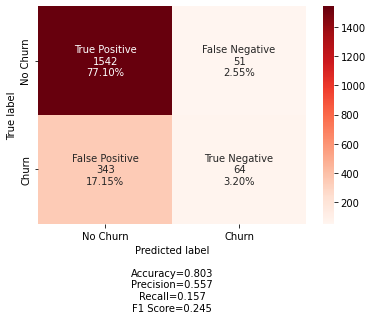

In [233]:
# Dropout
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'No Churn','Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

c. Random Forest ( non- neural ) may be a good solution as well for the cost consciencious- 

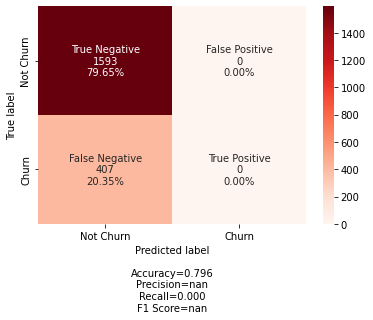

In [234]:
cm3=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churn','Churn']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds')

# Final recommendations- Business Recommendations
1. Business leaders need to look closer at the Germany Churn figures. Germany has a higher percentage , it may be a good idea to attempt to isolate the root cause of this issue. 
2. Bank leaders will want to do further research into the differnces in the churn numbers by gender. 
3. Bank leadership may want to utilize several models in steps. For example, the bank could employ the drop out model , after we have experienced some of the benefits, they could then employ the GridSearch CV model. 
